In [7]:
import pandas as pd
import matplotlib.pyplot as plt


#  Q1 How many titles were added per year( The date need to be converted to datetime format)(This helps understand how Netflix's library has grown over time)

In [11]:
all_sheets = pd.read_excel(r"C:\Users\pc\Desktop\Tableau\Neflix project mine\netflix_titles.xlsx", sheet_name=None)

In [14]:
print(all_sheets.keys())

dict_keys(['netflix_titles', 'netflix_titles_directors', 'netflix_titles_countries', 'netflix_titles_cast', 'netflix_titles_category'])


In [16]:
netflix_titles = all_sheets['netflix_titles']

In [18]:
netflix_titles

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0
...,...,...,...,...,...,...,...,...,...
6231,NaN,13,TV Show,Red vs. Blue,NaN,2015.0,NR,"This parody of first-person shooter games, mil...",80000063.0
6232,NaN,4,TV Show,Maron,NaN,2016.0,TV-MA,"Marc Maron stars as Marc Maron, who interviews...",70286564.0
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0


In [26]:
netflix_titles['date_added'] = pd.to_datetime(netflix_titles['date_added'], errors='coerce')


In [28]:
invalid_dates = netflix_titles[netflix_titles['date_added'].isna()]

In [30]:
print(invalid_dates) 

          duration_minutes     duration_seasons     type  \
2017                    40                  NaN    Movie   
2018      Flying Fortress"  2017-03-31 00:00:00     1944   
4525   and probably will."             80188902      NaN   
6225                   NaN                    2  TV Show   
6226                   NaN                    5  TV Show   
6227                   NaN                   11  TV Show   
6228                   NaN                    3  TV Show   
6229                   NaN                    2  TV Show   
6230                   NaN                    2  TV Show   
6231                   NaN                   13  TV Show   
6232                   NaN                    4  TV Show   
6233                    60                  NaN    Movie   
6234                   NaN                    2  TV Show   
6235                   NaN                   10  TV Show   

                                            title date_added  release_year  \
2017              The

In [36]:
titles_per_year = netflix_titles['date_added'].dt.year.value_counts().sort_index()

In [38]:
titles_per_year 

date_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       7
2013.0      12
2014.0      25
2015.0      90
2016.0     456
2017.0    1299
2018.0    1782
2019.0    2349
2020.0     184
Name: count, dtype: int64

<Axes: xlabel='date_added'>

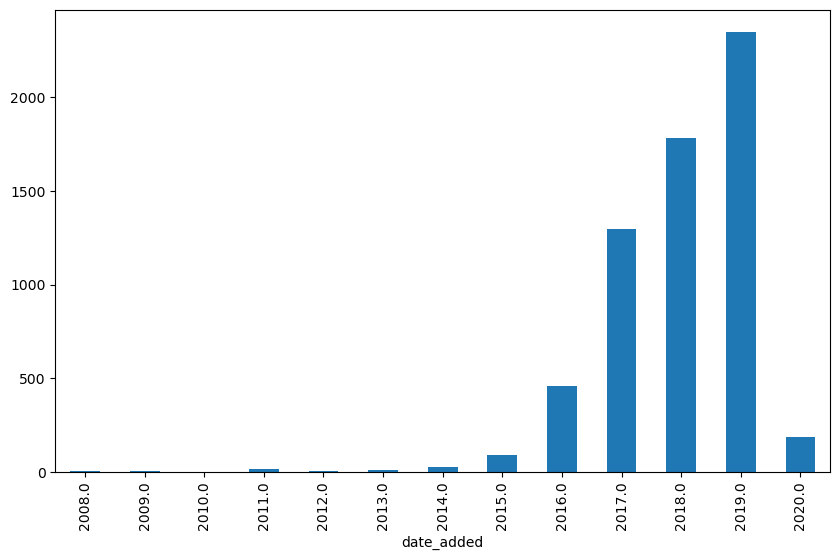

In [40]:
plt.figure(figsize=(10,6))
titles_per_year.plot(kind='bar')


# Q2 Which genre has the highest number of titles?(Identifying the most common genres on Netflix)

In [50]:
netflix_titles_category = all_sheets['netflix_titles_category']

In [52]:
netflix_titles_category

,listed_in,show_id
0,Children & Family Movies,81145628
1,Stand-Up Comedy,80117401
2,Kids' TV,70234439
3,Kids' TV,80058654
4,Comedies,80125979
...,...,...
13665,TV Action & Adventure,80126877
13666,TV Comedies,80126599
13667,TV Comedies,70243132
13668,TV Sci-Fi & Fantasy,80000063


In [54]:
genre_counts = netflix_titles_category['listed_in'].str.split(',').explode().value_counts()

In [56]:
genre_counts

listed_in
International Movies            1927
Dramas                          1623
Comedies                        1113
International TV Shows          1001
Documentaries                    668
TV Dramas                        599
Action & Adventure               597
Independent Movies               552
TV Comedies                      436
Thrillers                        392
Children & Family Movies         378
Romantic Movies                  376
Crime TV Shows                   363
Kids' TV                         328
Stand-Up Comedy                  281
Docuseries                       279
Romantic TV Shows                278
Horror Movies                    262
Music & Musicals                 243
British TV Shows                 210
Sci-Fi & Fantasy                 193
Sports Movies                    157
Reality TV                       153
Korean TV Shows                  132
TV Action & Adventure            126
Anime Series                     117
Spanish-Language TV Shows   

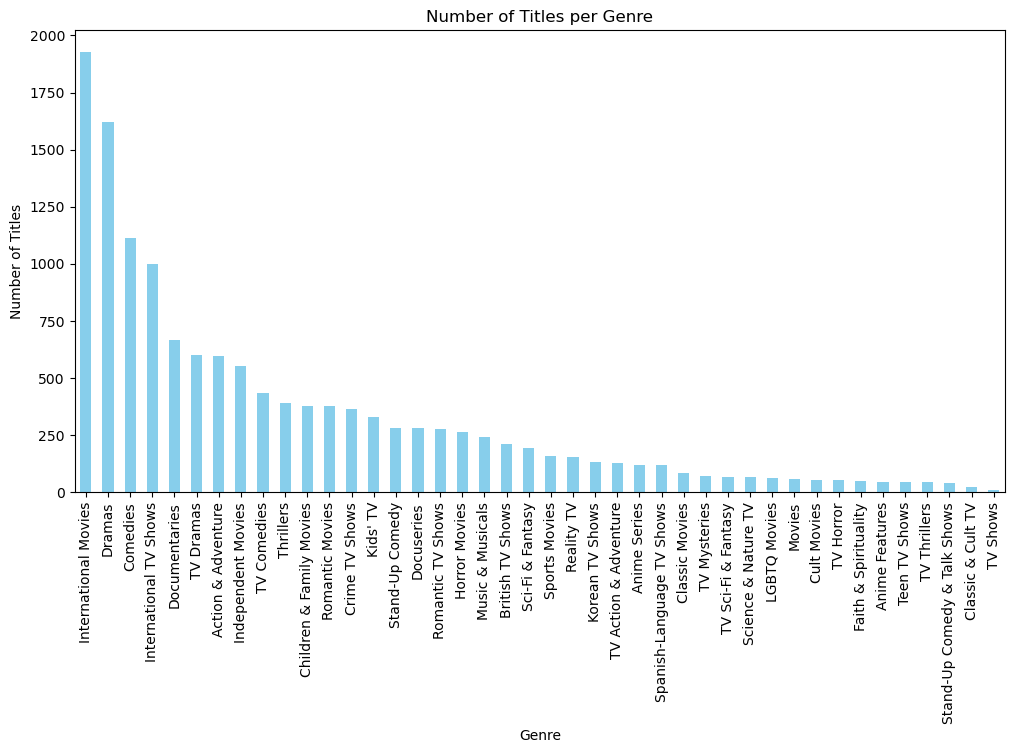

In [58]:
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Titles per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.show()


# Q3 Which country has produced the most titles?(Understanding which countries contribute the most content to Netflix's library.)

In [60]:
netflix_titles_countries = all_sheets['netflix_titles_countries']

In [62]:
netflix_titles_countries

,country,show_id
0,Germany,80016401
1,South Africa,80182274
2,United States,80182274
3,United States,81145628
4,United Kingdom,80117401
...,...,...
7174,United States,70285728
7175,New Zealand,80182274
7176,Uruguay,80182274
7177,United States,80016401


In [64]:
country_counts = netflix_titles_countries['country'].value_counts()

In [66]:
country_counts

country
United States      2609
India               838
United Kingdom      601
Canada              318
France              271
                   ... 
United Kingdom,       1
Poland,               1
Slovakia              1
Botswana              1
Ecuador               1
Name: count, Length: 113, dtype: int64

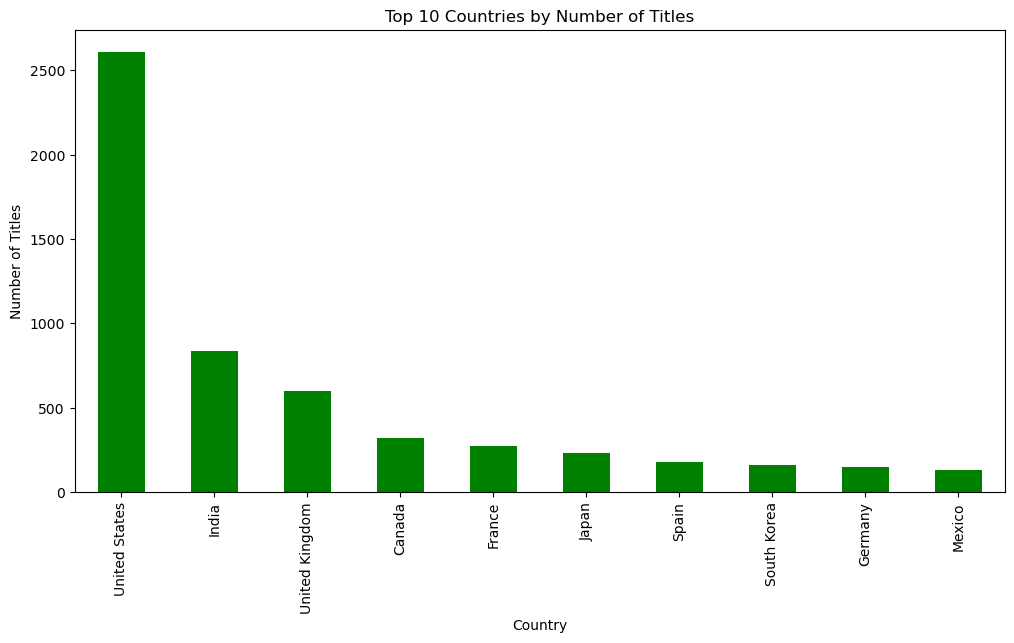

In [68]:
plt.figure(figsize=(12,6))
country_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

# Q4 What is the distribution of movie vs. TV show titles?(Identifying the proportion of movies to TV shows on Netflix.)

In [70]:
type_counts = netflix_titles['type'].value_counts()

In [72]:
type_counts

type
Movie      4265
TV Show    1969
1944          1
Name: count, dtype: int64

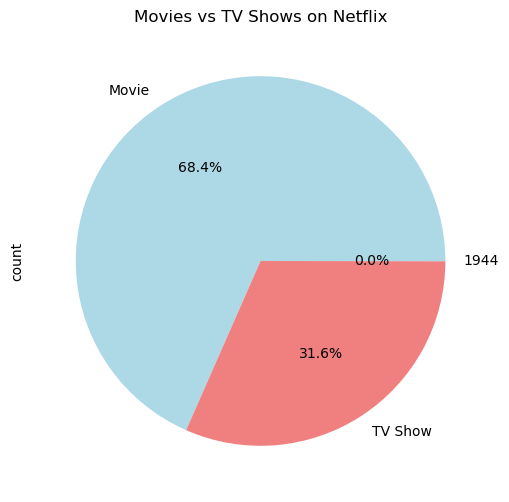

In [74]:
plt.figure(figsize=(6,6))
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Movies vs TV Shows on Netflix')
plt.show()

# Q5 What is the average duration of movies on Netflix?(Understanding the average length of Netflix movies.)

In [82]:
movies = netflix_titles[netflix_titles['type'] == 'Movie']

In [92]:
netflix_titles = all_sheets['netflix_titles']

In [94]:
netflix_titles

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0
...,...,...,...,...,...,...,...,...,...
6231,NaN,13,TV Show,Red vs. Blue,NaT,2015.0,NR,"This parody of first-person shooter games, mil...",80000063.0
6232,NaN,4,TV Show,Maron,NaT,2016.0,TV-MA,"Marc Maron stars as Marc Maron, who interviews...",70286564.0
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaT,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaT,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0


In [130]:
movies.loc[:, 'duration_minutes'] = pd.to_numeric(movies['duration_minutes'], errors='coerce')

In [132]:
movies.loc[:, 'duration_minutes']

0        90
1        94
4        99
6       110
7        60
       ... 
5579     70
5580    102
5581     88
5582    109
6233     60
Name: duration_minutes, Length: 4265, dtype: object

In [134]:
avg_duration = movies.loc[:, 'duration_minutes'].mean()
print(f'The average duration of movies on Netflix is {avg_duration} minutes.')


The average duration of movies on Netflix is 99.10082063305978 minutes.


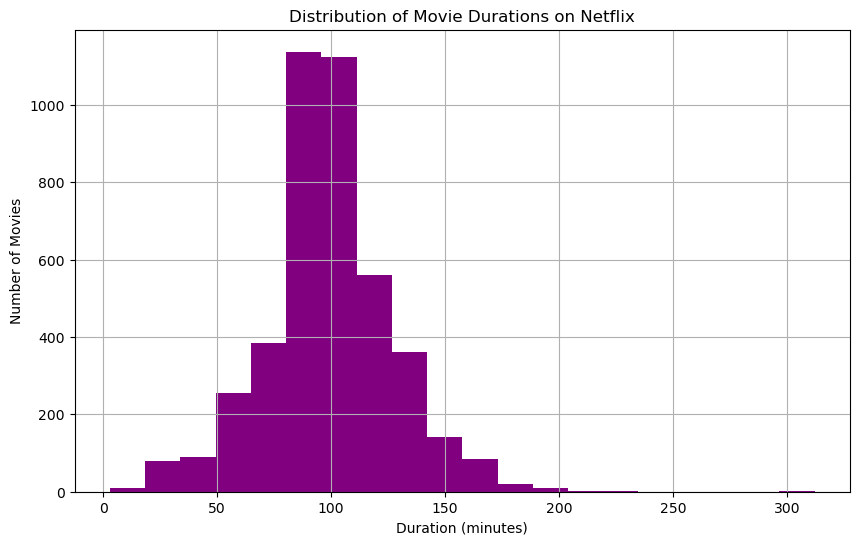

In [138]:
plt.figure(figsize=(10,6))
movies.loc[:, 'duration_minutes'] .hist(bins=20, color='purple')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


# Q6 Which directors have directed the most content?(Discovering the most prolific directors on Netflix)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_sheets = pd.read_excel(r"C:\Users\pc\Desktop\Tableau\Neflix project mine\netflix_titles.xlsx", sheet_name=None)

In [3]:
print(all_sheets.keys())

dict_keys(['netflix_titles', 'netflix_titles_directors', 'netflix_titles_countries', 'netflix_titles_cast', 'netflix_titles_category'])


In [43]:
netflix_titles_directors = all_sheets['netflix_titles_directors']

In [45]:
netflix_titles_directors

,director,show_id
0,Richard Finn,81145628
1,Fernando Lebrija,80125979
2,Gabe Ibáñez,70304989
3,Rodrigo Toro,80164077
4,Henrik Ruben Genz,70304990
...,...,...
4847,Dennis Widmyer,80096585
4848,Raja Sen,80108386
4849,Drue Metz,80213400
4850,Abdullah Al Noor,81048551


In [49]:
director_counts = netflix_titles_directors['director'].value_counts()

In [51]:
director_counts

director
Jan Suter          21
Raúl Campos        19
Marcus Raboy       14
Jay Karas          14
Jay Chapman        12
                   ..
Haissam Hussain     1
Mitch Gould         1
Kaizad Gustad       1
Clay Porter         1
Patrik Forsberg     1
Name: count, Length: 3655, dtype: int64

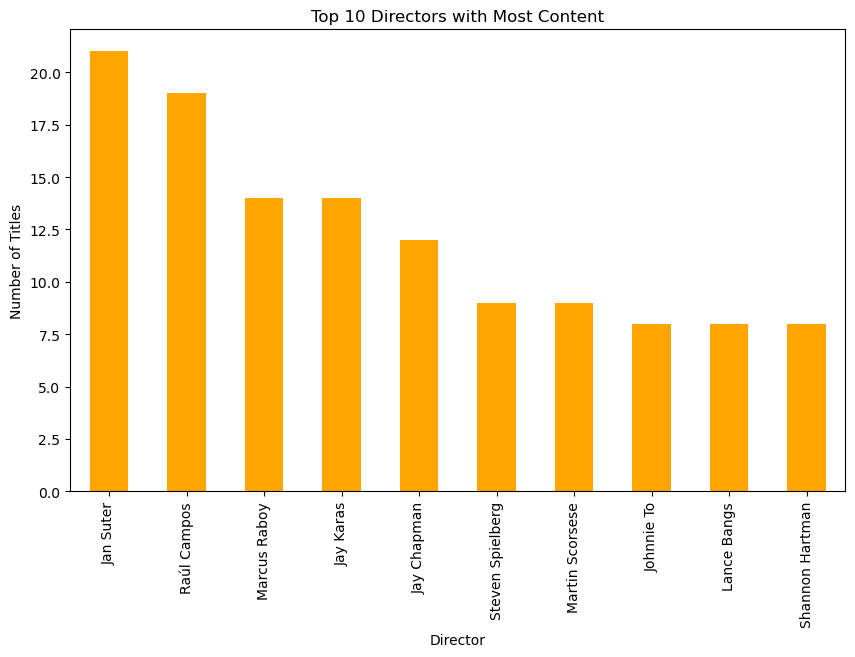

In [53]:
# Plot
plt.figure(figsize=(10,6))
director_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Directors with Most Content')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.show()


 # Q7 What is the most common rating on Netflix?(Understanding which content rating is the most prevalent.)

In [55]:
rating_counts = netflix_titles['rating'].value_counts()

In [57]:
rating_counts

rating
TV-MA       2027
TV-14       1698
TV-PG        700
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: count, dtype: int64

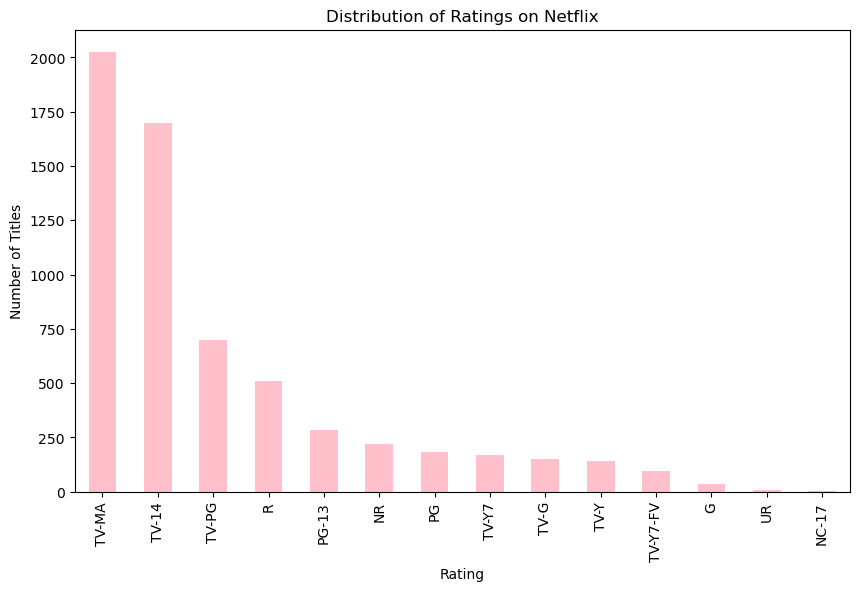

In [59]:
# Plot
plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar', color='pink')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()


  # Q8 What is the trend of adding content by month?(Identifying seasonal trends for adding content)

In [63]:
netflix_titles['date_added'] = pd.to_datetime(netflix_titles['date_added'], errors='coerce') # convert date_added to datetime


In [65]:
netflix_titles['date_added']

0      2019-09-09
1      2016-09-09
2      2018-09-08
3      2018-09-08
4      2017-09-08
          ...    
6231          NaT
6232          NaT
6233          NaT
6234          NaT
6235          NaT
Name: date_added, Length: 6236, dtype: datetime64[ns]

In [67]:
netflix_titles['month_added'] = netflix_titles['date_added'].dt.month


In [69]:
netflix_titles['month_added']

0       9.0
1       9.0
2       9.0
3       9.0
4       9.0
       ... 
6231    NaN
6232    NaN
6233    NaN
6234    NaN
6235    NaN
Name: month_added, Length: 6236, dtype: float64

In [71]:
# Group by month and count

titles_per_month = netflix_titles['month_added'].value_counts().sort_index()


In [73]:
titles_per_month

month_added
1.0     610
2.0     378
3.0     550
4.0     447
5.0     428
6.0     393
7.0     474
8.0     509
9.0     479
10.0    646
11.0    612
12.0    696
Name: count, dtype: int64

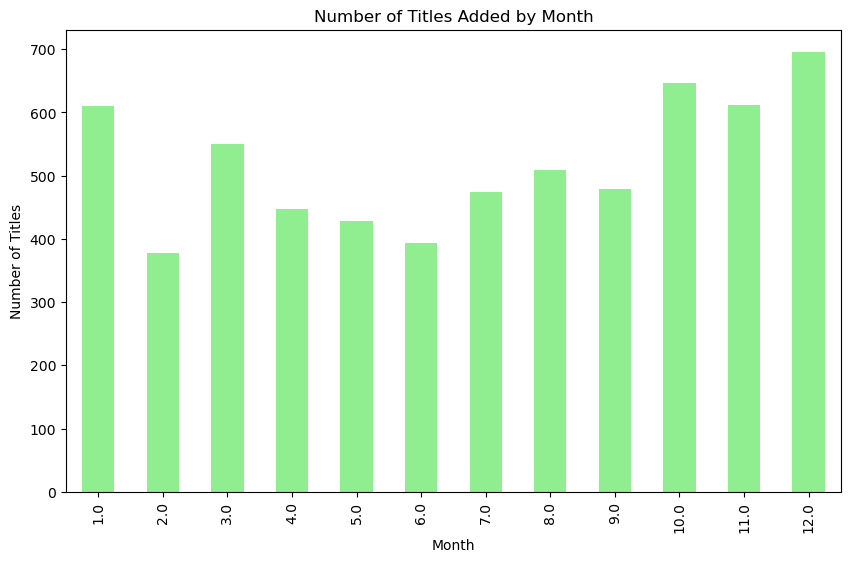

In [75]:
# Plot
plt.figure(figsize=(10,6))
titles_per_month.plot(kind='bar', color='lightgreen')
plt.title('Number of Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()


   # Q8 What are the top genres in terms of average movie duration?(Understanding which genres tend to have longer movies)

In [79]:
# Filter for movies and explode genres
netflix_titles_movies = netflix_titles[netflix_titles['type'] == 'Movie']
netflix_titles_movies = netflix_titles_movies.assign(genres=netflix_titles_category['listed_in'].str.split(',')).explode('genres')


In [83]:
netflix_titles_movies

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,month_added,genres
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,9.0,Children & Family Movies
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0,9.0,Stand-Up Comedy
4,99,NaN,Movie,#realityhigh,2017-09-08,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0,9.0,Comedies
6,110,NaN,Movie,Automata,2017-09-08,2014.0,R,"In a dystopian future, an insurance adjuster f...",70304989.0,9.0,International Movies
7,60,NaN,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017.0,TV-MA,Fabrizio Copano takes audience participation t...,80164077.0,9.0,Stand-Up Comedy
...,...,...,...,...,...,...,...,...,...,...,...
5579,70,NaN,Movie,Frank and Cindy,2016-04-01,2007.0,TV-MA,Frank was a rising pop star when he married Ci...,80085438.0,4.0,Documentaries
5580,102,NaN,Movie,Frank and Cindy,2016-04-01,2015.0,R,A student filmmaker vengefully turns his camer...,80085439.0,4.0,Documentaries
5581,88,NaN,Movie,Iverson,2016-04-01,2014.0,NR,This unfiltered documentary follows the rocky ...,80011846.0,4.0,Anime Series
5582,109,NaN,Movie,Jeremy Scott: The People's Designer,2016-04-01,2015.0,PG-13,The journey of fashion designer Jeremy Scott f...,80064521.0,4.0,Kids' TV


In [103]:
#Replace NaN values with 0 before conversion
netflix_titles_movies['duration'] = netflix_titles['duration_minutes'].fillna('0 min')

In [105]:
netflix_titles_movies['duration'] 

0        90
1        94
4        99
6       110
7        60
       ... 
5579     70
5580    102
5581     88
5582    109
6233     60
Name: duration, Length: 4265, dtype: object

In [115]:
netflix_titles_movies = netflix_titles_movies.dropna(subset=['duration']) # Drop rows with NaN values in the 'duration' column

In [119]:
netflix_titles_movies

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,month_added,genres,duration
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,9.0,Children & Family Movies,90
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0,9.0,Stand-Up Comedy,94
4,99,NaN,Movie,#realityhigh,2017-09-08,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0,9.0,Comedies,99
6,110,NaN,Movie,Automata,2017-09-08,2014.0,R,"In a dystopian future, an insurance adjuster f...",70304989.0,9.0,International Movies,110
7,60,NaN,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017.0,TV-MA,Fabrizio Copano takes audience participation t...,80164077.0,9.0,Stand-Up Comedy,60
...,...,...,...,...,...,...,...,...,...,...,...,...
5579,70,NaN,Movie,Frank and Cindy,2016-04-01,2007.0,TV-MA,Frank was a rising pop star when he married Ci...,80085438.0,4.0,Documentaries,70
5580,102,NaN,Movie,Frank and Cindy,2016-04-01,2015.0,R,A student filmmaker vengefully turns his camer...,80085439.0,4.0,Documentaries,102
5581,88,NaN,Movie,Iverson,2016-04-01,2014.0,NR,This unfiltered documentary follows the rocky ...,80011846.0,4.0,Anime Series,88
5582,109,NaN,Movie,Jeremy Scott: The People's Designer,2016-04-01,2015.0,PG-13,The journey of fashion designer Jeremy Scott f...,80064521.0,4.0,Kids' TV,109


In [121]:
genre_durations = netflix_titles_movies.groupby('genres')['duration'].mean().sort_values(ascending=False) # Group by genre and calculate mean duration

In [123]:
genre_durations

genres
International Movies            109.515152
Action & Adventure              108.009416
Cult Movies                          107.2
Dramas                          106.947313
Comedies                        105.348936
Sci-Fi & Fantasy                104.142857
Independent Movies              103.214286
Classic Movies                   99.666667
TV Horror                             98.5
Horror Movies                    97.748634
Thrillers                        97.657143
Crime TV Shows                   97.622222
International TV Shows           97.553846
Anime Series                      97.21875
Anime Features                        97.2
Docuseries                       97.196078
British TV Shows                 96.145455
TV Dramas                           95.625
Classic & Cult TV                     93.5
Music & Musicals                 92.909091
TV Action & Adventure                 91.0
TV Shows                         90.666667
Documentaries                     88.62037
Kids

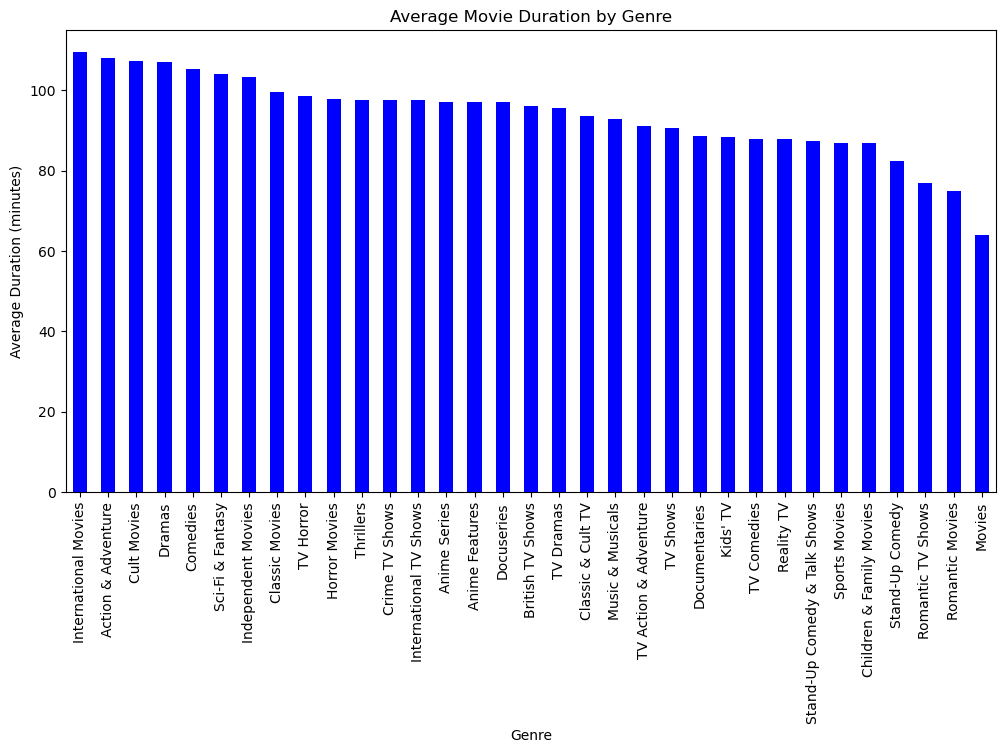

In [137]:
# Plot
plt.figure(figsize=(12,6))
genre_durations.plot(kind='bar', color='blue')
plt.title('Average Movie Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.show()
